In [1]:
import numpy as np
import pandas as pd
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Transaction_Naration_Data_Set.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [6]:
df = df.drop_duplicates(subset='NARATION')
narrations = df['NARATION'].fillna("")
print(narrations)

0                                               Cash Withdraw
1                              Cash Withdrawal From A/C No.: 
2            Cash withdraw from Micro Merchant point, MM A/C 
3           Credit Against Merchant Cash Withdraw Service ...
6                                   Cash Deposit to A/C No.: 
                                  ...                        
22538287                                         Guatala Udc 
22539045    Transaction For Fund Transfer. Smart App, Regu...
22539930                   Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261                    আসাদ ভাই এর কাছে জমা  হাজার টাকা 
22544595    গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস  সেবা  আদ...
Name: NARATION, Length: 128604, dtype: object


**Text Cleaning**

In [7]:
# lowercase

narrations = narrations.str.lower()
print(narrations)

0                                               cash withdraw
1                              cash withdrawal from a/c no.: 
2            cash withdraw from micro merchant point, mm a/c 
3           credit against merchant cash withdraw service ...
6                                   cash deposit to a/c no.: 
                                  ...                        
22538287                                         guatala udc 
22539045    transaction for fund transfer. smart app, regu...
22539930                   cash deposit গারামাসি উল্লী উন্নয়ন
22543261                    আসাদ ভাই এর কাছে জমা  হাজার টাকা 
22544595    গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস  সেবা  আদ...
Name: NARATION, Length: 128604, dtype: object


In [8]:
# special char and punctuation remove 

narrations = narrations.replace('[^A-Za-z ]+', '', regex=True)
print(narrations)

0                                               cash withdraw
1                                 cash withdrawal from ac no 
2              cash withdraw from micro merchant point mm ac 
3           credit against merchant cash withdraw service ...
6                                      cash deposit to ac no 
                                  ...                        
22538287                                         guatala udc 
22539045    transaction for fund transfer smart app regula...
22539930                                      cash deposit   
22543261                                                     
22544595                                                     
Name: NARATION, Length: 128604, dtype: object


In [9]:
# stop words removal

stopwords = stopwords.words('english')
narrations = narrations.apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
print(narrations)

0                                               cash withdraw
1                                          cash withdrawal ac
2                    cash withdraw micro merchant point mm ac
3                    credit merchant cash withdraw service ac
6                                             cash deposit ac
                                  ...                        
22538287                                          guatala udc
22539045    transaction fund transfer smart app regular fu...
22539930                                         cash deposit
22543261                                                     
22544595                                                     
Name: NARATION, Length: 128604, dtype: object


In [10]:
# tokenization

narrations = narrations.apply(lambda data: nltk.word_tokenize(data))
print(narrations)

0                                            [cash, withdraw]
1                                      [cash, withdrawal, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3             [credit, merchant, cash, withdraw, service, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transaction, fund, transfer, smart, app, regu...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [11]:
# stemming
ps = PorterStemmer()

def stem_narrations(data):
  return [ps.stem(word) for word in data]

stem_narrations = narrations.apply(lambda data: stem_narrations(data))
print(stem_narrations)

0                                            [cash, withdraw]
1                                        [cash, withdraw, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3              [credit, merchant, cash, withdraw, servic, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transact, fund, transfer, smart, app, regular...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [12]:
# lemmatization

lemmatizer=WordNetLemmatizer()

def lemma_narrations(data):
    return [lemmatizer.lemmatize(word) for word in data]


lemma_narrations = narrations.apply(lambda data: lemma_narrations(data))
print(lemma_narrations)

0                                            [cash, withdraw]
1                                      [cash, withdrawal, ac]
2            [cash, withdraw, micro, merchant, point, mm, ac]
3             [credit, merchant, cash, withdraw, service, ac]
6                                         [cash, deposit, ac]
                                  ...                        
22538287                                       [guatala, udc]
22539045    [transaction, fund, transfer, smart, app, regu...
22539930                                      [cash, deposit]
22543261                                                   []
22544595                                                   []
Name: NARATION, Length: 128604, dtype: object


In [13]:
narrations = lemma_narrations

**Text Exploratory Analysis**

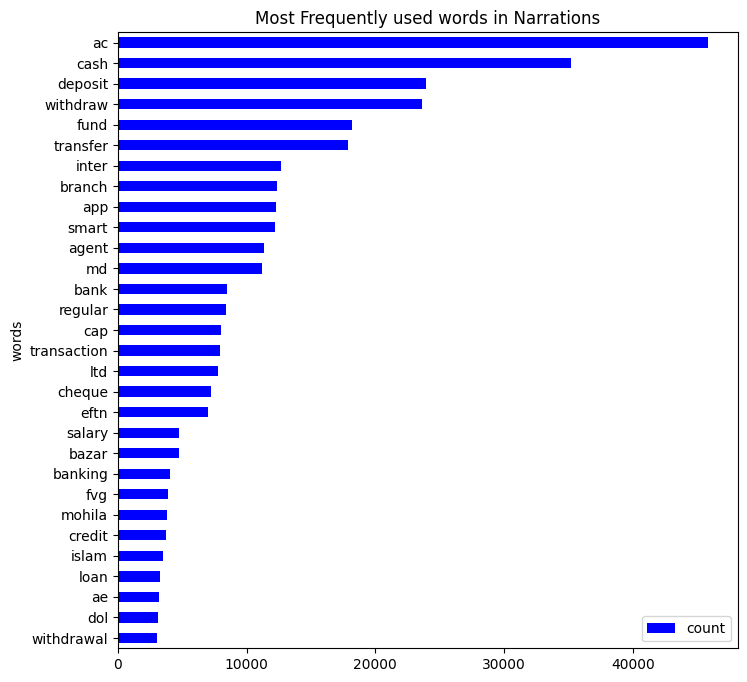

In [14]:
# visualize most frequent words

import itertools
import collections
import matplotlib.pyplot as plt

lemmatized_tokens = list(narrations)
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_tweets = pd.DataFrame(counts_no.most_common (30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='blue')
ax.set_title("Most Frequently used words in Narrations")

plt.show()

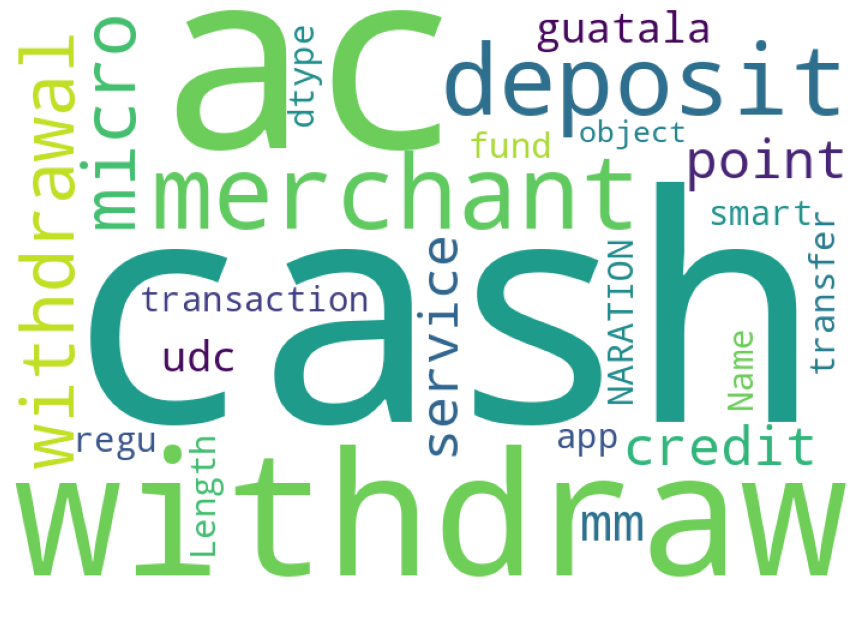

In [16]:
# wordcloud visualization

from wordcloud import WordCloud

wordcloud = WordCloud(width = 700, height = 500, background_color ='white',stopwords = stopwords, min_font_size = 5).generate(str(narrations))

plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud)

plt.axis("off")

plt.tight_layout(pad = 0)

plt.show()